# Prb Statement - Predicting whether a person has which type of breast cancer - 'Benign'/'Malignant'

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [98]:
#Dropping id column
df.drop(['id'],axis=1,inplace=True)

In [99]:
df.shape

(569, 32)

In [100]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Checking for missing and null values

In [102]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [103]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [104]:
#Since it is completely null , dropping it 
df.drop(['Unnamed: 32'],axis=1,inplace=True)

# Encoding all categorical variable to numerical variable

In [105]:
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(encoding_method='arbitrary')
df= encoder.fit_transform(df)
print(encoder.encoder_dict_)

{'diagnosis': {'M': 0, 'B': 1}}


# Seperating Independant and dependant variable

In [106]:
X=df.drop(['diagnosis'],axis=1)
Y = df[['diagnosis']]

# Checking for constant / zero variance variable

In [107]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit_transform(X)
cols = var.get_support(indices=True)
print(cols)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [108]:
# No col are dropped as none have zero variance

# Removing Corelated Variable

In [109]:
from feature_engine.selection import SmartCorrelatedSelection
# set up the selector
tr = SmartCorrelatedSelection(
    method="pearson",
    threshold=0.75,
    selection_method="variance",
)

X = tr.fit_transform(X)

In [110]:
print(tr.correlated_feature_sets_)

[{'radius_worst', 'concave points_mean', 'area_mean', 'radius_mean', 'area_worst', 'perimeter_mean', 'perimeter_worst'}, {'texture_mean', 'texture_worst'}, {'smoothness_mean', 'smoothness_worst'}, {'concavity_mean', 'compactness_worst', 'concave points_worst', 'compactness_mean', 'concavity_worst'}, {'fractal_dimension_mean', 'fractal_dimension_worst'}, {'perimeter_se', 'radius_se', 'area_se'}, {'fractal_dimension_se', 'concavity_se', 'compactness_se'}]


In [111]:
X.shape

(569, 13)

# Outlier handling

In [112]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,symmetry_mean,texture_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.181162,1.216853,40.337079,0.007041,0.031894,0.011796,0.020542,25.677223,880.583128,0.132369,0.272188,0.290076,0.083946
std,0.027414,0.551648,45.491006,0.003003,0.030186,0.006170,0.008266,6.146258,569.356993,0.022832,0.208624,0.061867,0.018061
min,0.106000,0.360200,6.802000,0.001713,0.000000,0.000000,0.007882,12.020000,185.200000,0.071170,0.000000,0.156500,0.055040
1%,0.129508,0.410548,8.514440,0.003058,0.000000,0.000000,0.010547,15.200800,256.192000,0.087910,0.000000,0.176028,0.058580
5%,0.141500,0.540140,11.360000,0.003690,0.003253,0.003831,0.011758,16.574000,331.060000,0.095734,0.018360,0.212700,0.062558
10%,0.149580,0.640400,13.160000,0.004224,0.007726,0.005493,0.013012,17.800000,384.720000,0.102960,0.045652,0.226120,0.065792
25%,0.161900,0.833900,17.850000,0.005169,0.015090,0.007638,0.015160,21.080000,515.300000,0.116600,0.114500,0.250400,0.071460
50%,0.179200,1.108000,24.530000,0.006380,0.025890,0.010930,0.018730,25.410000,686.500000,0.131300,0.226700,0.282200,0.080040
75%,0.195700,1.474000,45.190000,0.008146,0.042050,0.014710,0.023480,29.720000,1084.000000,0.146000,0.382900,0.317900,0.092080


In [113]:
# There are no much difference btw min nad 1% data and max and 99% data , so not removing the outlier

# def outlier_cap(x):
#     x=x.clip(lower=x.quantile(0.01))
#     x=x.clip(upper=x.quantile(0.99))
#     return(x)

# num=num.apply(lambda x : outlier_cap(x))

# Splitting of training and test data 

In [114]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.20,random_state=42)

# Modelling

In [117]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [80]:
param_dist = {'max_depth': [4,5,6,7,8,9],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy'],
              }

cv_rf = GridSearchCV(model, cv = 10, param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_Train, Y_Train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt'}


In [81]:
model.set_params(max_depth= 9, criterion='entropy',max_features='sqrt', bootstrap=True)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt')

# OOB Error Rate

In [82]:
# We are doing this to find the max no trees we want to create. Min value is 15 so we are taking a range of 15-1000 . 
# And we are calculating the error at each value of n_estimator . 
# The value at which error is constant . That is considered as the optimal value .

In [83]:
model.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model.set_params(n_estimators=i)
    model.fit(X_Train, Y_Train)

    oob_error = 1 - model.oob_score_
    error_rate[i] = oob_error

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)
<ipython-input-83-d91ff49b3beb>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [84]:
#Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

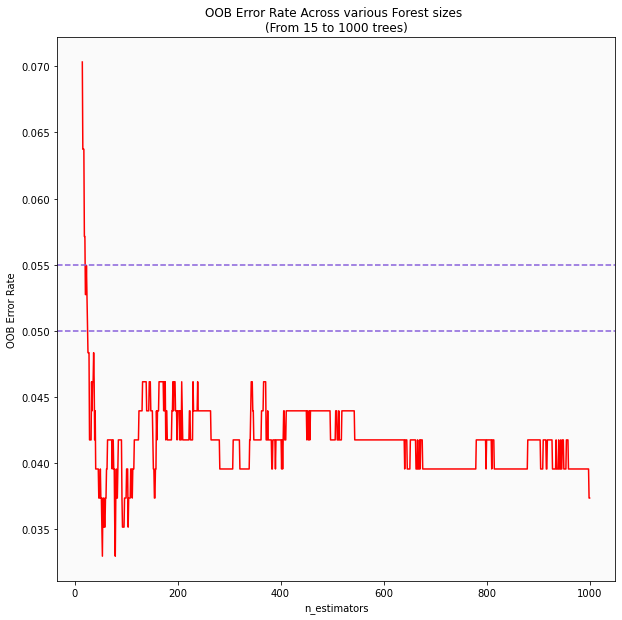

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [87]:
# for i in range(400,600):
#     print(error_rate[i])

In [118]:
# Redefine the tree via OOB Output
model.set_params(n_estimators=400, bootstrap = True, warm_start=False, oob_score=False)

# bootstrap, default=True
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

# oob_score, default=False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

# warm_start, default=False
# When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, 
# otherwise, just fit a whole new forest. See the Glossary.

RandomForestClassifier(n_estimators=400)

In [119]:
model.fit(X_Train, Y_Train)

<ipython-input-119-fc8e24ea2047>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_Train, Y_Train)


RandomForestClassifier(n_estimators=400)

# Feature Importance

In [121]:
feature_importances=pd.DataFrame(model.feature_importances_, index=X_Train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
area_worst,0.311024
area_se,0.182770
concavity_worst,0.169498
texture_worst,0.061544
symmetry_worst,0.052608
concavity_se,0.049257
smoothness_worst,0.046349
concave points_se,0.036471
fractal_dimension_worst,0.022374
symmetry_mean,0.018463


# Predictions

In [91]:
diagnosis_predicted = model.predict(X_Test)
print(diagnosis_predicted)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


# Model Performance

In [92]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Accuracy of testing data:",metrics.accuracy_score(Y_Test, diagnosis_predicted))
print("Precision",metrics.precision_score(Y_Test, diagnosis_predicted))
print("Recall",metrics.recall_score(Y_Test, diagnosis_predicted))
print("f1_score",metrics.f1_score(Y_Test, diagnosis_predicted))  

Accuracy of testing data: 0.9824561403508771
Precision 0.9726027397260274
Recall 1.0
f1_score 0.9861111111111112


# Area Under the curve

In [93]:
fpr, tpr,_= roc_curve(Y_Test, diagnosis_predicted)
roc_auc= auc(fpr, tpr)

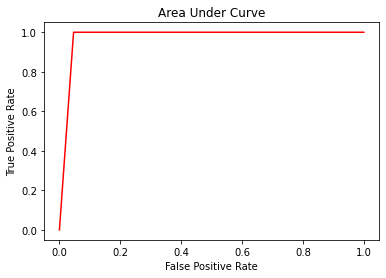

In [94]:
plt.plot(fpr, tpr, color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.show()

# Confusion Matrix

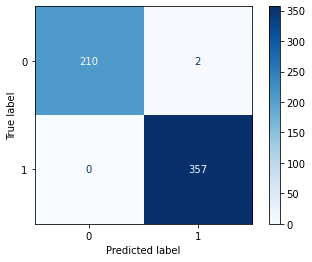

In [95]:
metrics.plot_confusion_matrix(model,X,Y,cmap='Blues')